In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor  

In [2]:
!pwd

/c/Users/avalencia/Documents/Flatiron/phase_2/project/bsc-phase-two-project/notebooks/exploratory/Alex


In [3]:
# Pull Dataframe
path = '../../../data/kc_house_data.csv'

df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Dropped the house with 33 bathrooms
df.drop(15856)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
# Replace all NaN values to 0.
df = df.replace(np.nan, 0)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
# Convert price from float to integer
df.price = df.price.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int32  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
df = df.loc[(df['bathrooms'] > 0.5) & (df['bathrooms'] < 5.75)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Text(0, 0.5, 'Price')

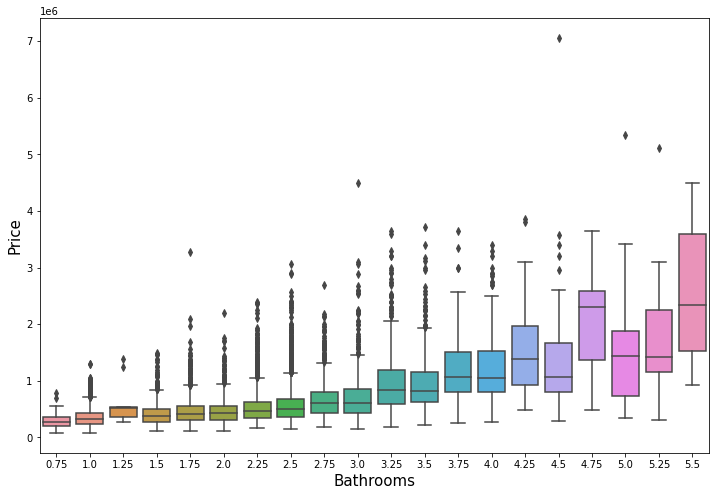

In [10]:
# Boxplot showing relationship between price and bathrooms
plt.figure(figsize=(12,8))
sns.boxplot(x=df['bathrooms'], y=df['price'])
plt.xlabel('Bathrooms', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [11]:
df.grade.value_counts()

7     8973
8     6062
9     2615
6     2036
10    1134
11     396
5      241
12      79
4       27
13       9
3        1
Name: grade, dtype: int64

Text(0, 0.5, 'Price')

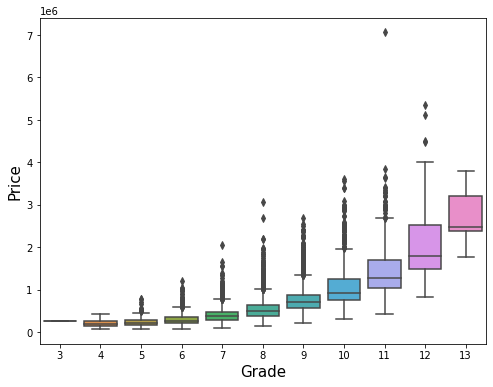

In [12]:
# Boxplot showing relationship between price and grade
plt.figure(figsize=(8,6))
sns.boxplot(x=df['grade'], y=df['price'])
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Price', fontsize=15)

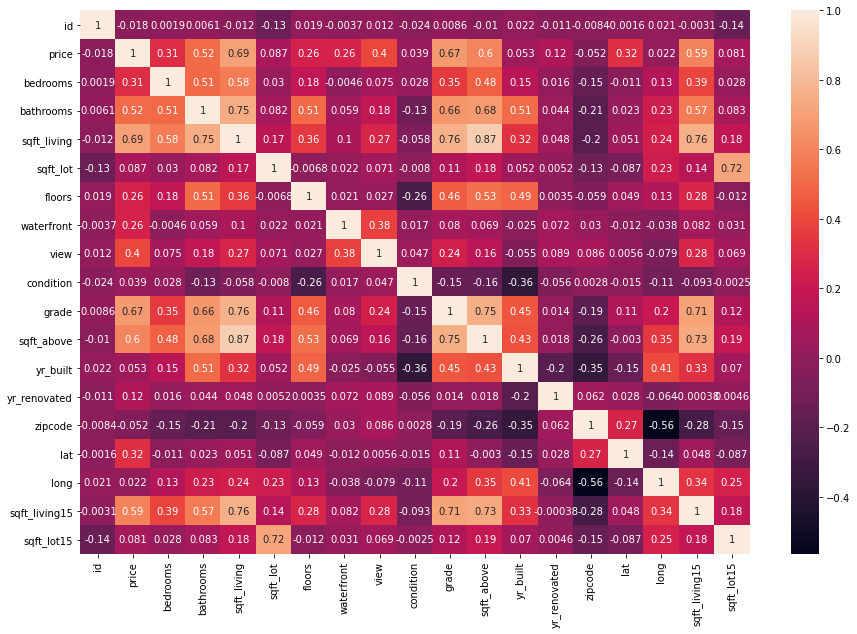

In [13]:
# Heatmap showing correlations
plt.figure(figsize=(15,10))

ax = sns.heatmap(df.corr(), annot=True);

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

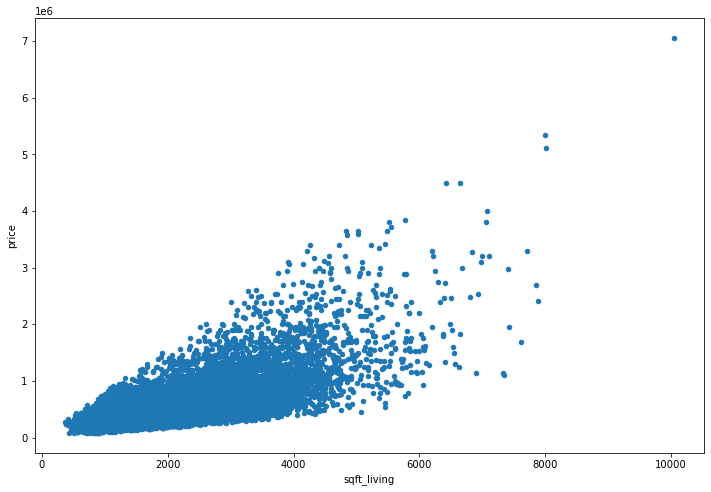

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=ax)

In [15]:
# Top 10 Zipcodes Based on Price
top = df.groupby('zipcode')['price'].mean().reset_index().sort_values('price', ascending=False)[:10]
top.sort_values('price', ascending=True, inplace=True)
top

,zipcode,price
4,98005,8.102897e+05
41,98102,8.335844e+05
5,98006,8.481604e+05
53,98119,8.497148e+05
43,98105,8.632289e+05
47,98109,8.800778e+05
48,98112,1.096239e+06
25,98040,1.167801e+06
3,98004,1.354013e+06
24,98039,1.956702e+06


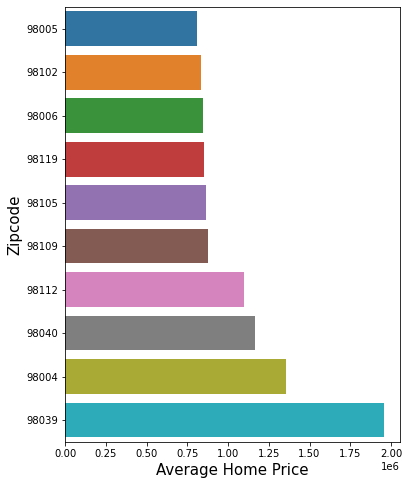

In [17]:
# Boxplot showing relatiionship between zipcode and price
plt.figure(figsize=(6,8))

sns.barplot(x='price', y='zipcode' , order=top['zipcode'], orient='h', data = top)

plt.ylabel('Zipcode', size=15)
plt.xlabel('Average Home Price', size=15)

plt.show()

In [18]:
top_10_zipcodes = (98039, 98004, 98040, 98112, 98109, 98105, 98119, 98006, 98102, 98005)

In [19]:
# Howses within the top 10 zipcodes
df1 = df[df['zipcode'].isin(top_10_zipcodes)]
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,8/26/2014,2000000,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
26,1794500383,6/26/2014,937000,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,0.0,98119,47.6386,-122.360,1760,3573
27,3303700376,12/1/2014,667000,3,1.00,1400,1581,1.5,0.0,0.0,...,8,1400,0.0,1909,0.0,98112,47.6221,-122.314,1860,3861
43,9270200160,10/28/2014,685000,3,1.00,1570,2280,2.0,0.0,0.0,...,7,1570,0.0,1922,0.0,98119,47.6413,-122.364,1580,2640
54,4217401195,3/3/2015,920000,5,2.25,2730,6000,1.5,0.0,0.0,...,8,2130,600.0,1927,0.0,98105,47.6571,-122.281,2730,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21552,524059330,1/30/2015,1700000,4,3.50,3830,8963,2.0,0.0,0.0,...,10,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
21563,7011201004,5/29/2014,645000,3,3.25,1730,1229,2.0,0.0,2.0,...,9,1320,410.0,2008,0.0,98119,47.6374,-122.369,1710,1686
21567,2025049203,6/10/2014,399950,2,1.00,710,1157,2.0,0.0,0.0,...,7,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21581,191100405,4/21/2015,1580000,4,3.25,3410,10125,2.0,0.0,0.0,...,10,3410,?,2007,0.0,98040,47.5653,-122.223,2290,10125


In [20]:
# Pulling the descriptive stats for price.
df1.describe()['price']

count    2.200000e+03
mean     1.015222e+06
std      5.707713e+05
min      1.693170e+05
25%      6.489380e+05
50%      8.500000e+05
75%      1.230000e+06
max      7.060000e+06
Name: price, dtype: float64

In [24]:
import statsmodels.api as sm

#instatiate OLS model 
model = sm.OLS(df1["price"], sm.add_constant(df1["sqft_living"])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3349.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:30:24   Log-Likelihood:                -31263.
No. Observations:                2200   AIC:                         6.253e+04
Df Residuals:                    2198   BIC:                         6.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3544.1584   1.91e+04      0.186      0.853   -3.39e+04     4.1e+04
sqft_living   385.4797      6.661     57.870      0.000     372.417     398.542
==============================================================================
Omnibus:                      681.641   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4498.502
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       9.510   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

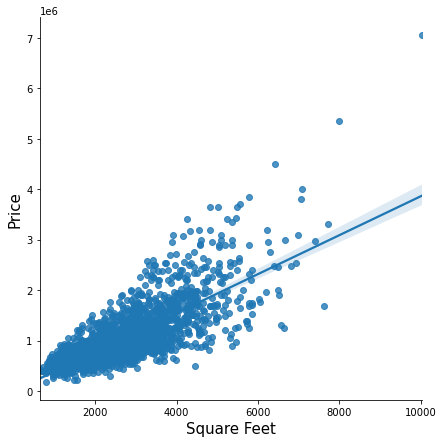

In [25]:
sns.lmplot(x='sqft_living', y='price', data=df1, height=6)

plt.ylabel('Price', fontsize=15)
plt.xlabel('Square Feet', fontsize=15)
plt.show()